In [41]:
from tensorflow import keras as kr
import numpy as np
import tensorflow as tf
from keras import callbacks

In [42]:
import os

In [43]:
train_path='C:\\Users\\vasia\\Desktop\\github3\\image recognition\\training_set'

In [44]:
test_path='C:\\Users\\vasia\\Desktop\\github3\\image recognition\\test_set'

In [45]:
os.listdir(train_path)

['cats', 'dogs']

In [46]:
os.listdir(test_path)

['cats', 'dogs']

### this time we wanted to analyze image recognition with neural networks

In [47]:
os.listdir(train_path+'\\cats')[0]

'cat.1.jpg'

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [49]:
object_cat=train_path+'\\cats\\'+'cat.1.jpg'

In [50]:
imread(object_cat).shape

(280, 300, 3)

### the first cat image of the training set

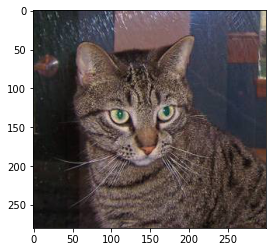

In [51]:
plt.imshow(imread(object_cat))

In [52]:
os.listdir(train_path+'\\dogs')[0]

'dog.1.jpg'

In [53]:
object_dog=train_path+'\\dogs\\'+'dog.1.jpg'

In [54]:
imread(object_dog).shape

(499, 327, 3)

### the first dog

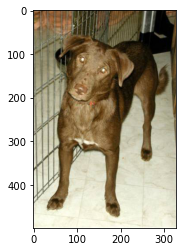

In [55]:
plt.imshow(imread(object_dog))

In [56]:
len(os.listdir(train_path+'\\cats'))

4000

In [57]:
len(os.listdir(train_path+'\\dogs'))

4000

In [58]:
len(os.listdir(test_path+'\\cats'))

1000

In [59]:
len(os.listdir(test_path+'\\dogs'))

1000

### for this dataset we employed keras from tensorflow

In [60]:
import tensorflow as tf
import datetime

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [63]:
image_gen=ImageDataGenerator(rescale=1/255)

In [64]:
image_gen.flow_from_directory(train_path)

Found 8000 images belonging to 2 classes.


In [65]:
train_image_gen=image_gen.flow_from_directory(train_path,target_size=(128,128),color_mode='rgb',batch_size=16,class_mode='binary')

Found 8000 images belonging to 2 classes.


In [66]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

### we split the training set to training and validation

In [67]:
tf.keras.utils.image_dataset_from_directory(
    train_path, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(128,
    128), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [68]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  label_mode='categorical',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(128,128),
  batch_size=32)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.


In [69]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  label_mode='categorical',  
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(128,128),
  batch_size=32)

Found 8000 files belonging to 2 classes.
Using 1600 files for validation.


In [70]:
train_ds.class_names

['cats', 'dogs']

### then we apply different models. Our purpose is to have high accuracy to both training and validation. if training is high but validation low then we have overfitting

In [33]:
model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(scale=1./255),
    tf.keras.layers.Conv2D(28, (4,4), activation='relu'),  
    tf.keras.layers.MaxPooling2D((2, 2)),  
    tf.keras.layers.Conv2D(56, (4,4), activation='relu'),  
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(
  train_ds,
  validation_data=val_ds,batch_size=128,
  epochs=10)


Epoch 1/10
200/200 [==============================] - 143s 707ms/step - loss: 0.7280 - accuracy: 0.5630 - val_loss: 0.6580 - val_accuracy: 0.6075
Epoch 2/10
200/200 [==============================] - 133s 663ms/step - loss: 0.6424 - accuracy: 0.6347 - val_loss: 0.6489 - val_accuracy: 0.6194
Epoch 3/10
200/200 [==============================] - 135s 672ms/step - loss: 0.5752 - accuracy: 0.7005 - val_loss: 0.6582 - val_accuracy: 0.6506
Epoch 4/10
200/200 [==============================] - 130s 649ms/step - loss: 0.4406 - accuracy: 0.7867 - val_loss: 0.8623 - val_accuracy: 0.6450
Epoch 5/10
200/200 [==============================] - 147s 737ms/step - loss: 0.2719 - accuracy: 0.8814 - val_loss: 1.1589 - val_accuracy: 0.6400
Epoch 6/10
200/200 [==============================] - 135s 676ms/step - loss: 0.1524 - accuracy: 0.9405 - val_loss: 1.3891 - val_accuracy: 0.6425
Epoch 7/10
200/200 [==============================] - 134s 669ms/step - loss: 0.0996 - accuracy: 0.9653 - val_loss: 1.5017 -

In [35]:
model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(scale=1./255),
    tf.keras.layers.Conv2D(28, (4,4), activation='relu'),  
    tf.keras.layers.MaxPooling2D((2, 2)),    
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
model.fit(
  train_ds,
  validation_data=val_ds,batch_size=256,
  epochs=10)

Epoch 1/10
200/200 [==============================] - 75s 371ms/step - loss: 0.7884 - accuracy: 0.6042 - val_loss: 0.6617 - val_accuracy: 0.5856
Epoch 2/10
200/200 [==============================] - 73s 364ms/step - loss: 0.5531 - accuracy: 0.7220 - val_loss: 0.5846 - val_accuracy: 0.7050
Epoch 3/10
200/200 [==============================] - 74s 372ms/step - loss: 0.4461 - accuracy: 0.7967 - val_loss: 0.5755 - val_accuracy: 0.7144
Epoch 4/10
200/200 [==============================] - 71s 353ms/step - loss: 0.3348 - accuracy: 0.8602 - val_loss: 0.6303 - val_accuracy: 0.7019
Epoch 5/10
200/200 [==============================] - 73s 364ms/step - loss: 0.2322 - accuracy: 0.9122 - val_loss: 0.6973 - val_accuracy: 0.7106
Epoch 6/10
200/200 [==============================] - 75s 377ms/step - loss: 0.1601 - accuracy: 0.9475 - val_loss: 0.8059 - val_accuracy: 0.7100
Epoch 7/10
200/200 [==============================] - 77s 385ms/step - loss: 0.1167 - accuracy: 0.9650 - val_loss: 1.0145 - val_ac

In [65]:
model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(scale=1./255),
    tf.keras.layers.Conv2D(16, (2,2), activation='relu'),  
    tf.keras.layers.MaxPooling2D(),  
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(),  
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'), 
    tf.keras.layers.MaxPooling2D(), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [66]:
model.fit(
  train_ds,
  validation_data=val_ds,batch_size=512,
  epochs=10)

Epoch 1/10
200/200 [==============================] - 50s 245ms/step - loss: 0.6610 - accuracy: 0.5975 - val_loss: 0.6068 - val_accuracy: 0.6825
Epoch 2/10
200/200 [==============================] - 51s 257ms/step - loss: 0.5562 - accuracy: 0.7120 - val_loss: 0.5369 - val_accuracy: 0.7306
Epoch 3/10
200/200 [==============================] - 54s 267ms/step - loss: 0.5022 - accuracy: 0.7514 - val_loss: 0.5322 - val_accuracy: 0.7400
Epoch 4/10
200/200 [==============================] - 49s 246ms/step - loss: 0.4538 - accuracy: 0.7903 - val_loss: 0.5114 - val_accuracy: 0.7481
Epoch 5/10
200/200 [==============================] - 49s 245ms/step - loss: 0.4235 - accuracy: 0.8091 - val_loss: 0.4823 - val_accuracy: 0.7744
Epoch 6/10
200/200 [==============================] - 49s 246ms/step - loss: 0.3887 - accuracy: 0.8253 - val_loss: 0.5042 - val_accuracy: 0.7625
Epoch 7/10
200/200 [==============================] - 49s 245ms/step - loss: 0.3556 - accuracy: 0.8439 - val_loss: 0.5057 - val_ac

In [67]:
model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(scale=1./255),
    tf.keras.layers.Conv2D(16, (2,2), activation='relu'),  
    tf.keras.layers.MaxPooling2D(),  
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(),  
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'), 
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'), 
    tf.keras.layers.MaxPooling2D(), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
model.fit(
  train_ds,
  validation_data=val_ds,batch_size=512,
  epochs=10)

Epoch 1/10
200/200 [==============================] - 53s 258ms/step - loss: 0.6611 - accuracy: 0.5934 - val_loss: 0.6224 - val_accuracy: 0.6325
Epoch 2/10
200/200 [==============================] - 52s 259ms/step - loss: 0.5725 - accuracy: 0.7002 - val_loss: 0.6363 - val_accuracy: 0.6769
Epoch 3/10
200/200 [==============================] - 52s 257ms/step - loss: 0.5214 - accuracy: 0.7448 - val_loss: 0.5005 - val_accuracy: 0.7569
Epoch 4/10
200/200 [==============================] - 52s 260ms/step - loss: 0.4799 - accuracy: 0.7698 - val_loss: 0.4737 - val_accuracy: 0.7862
Epoch 5/10
200/200 [==============================] - 51s 256ms/step - loss: 0.4286 - accuracy: 0.7970 - val_loss: 0.4606 - val_accuracy: 0.7862
Epoch 6/10
200/200 [==============================] - 52s 257ms/step - loss: 0.3875 - accuracy: 0.8228 - val_loss: 0.4432 - val_accuracy: 0.7931
Epoch 7/10
200/200 [==============================] - 52s 257ms/step - loss: 0.3409 - accuracy: 0.8447 - val_loss: 0.6220 - val_ac

In [71]:
model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(scale=1./255),
    tf.keras.layers.Conv2D(16, (2,2), activation='relu'),  
    tf.keras.layers.MaxPooling2D(),  
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),  
    tf.keras.layers.Conv2D(64, (4,4), activation='relu'), 
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'), 
    tf.keras.layers.MaxPooling2D(), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
model.fit(
  train_ds,
  validation_data=val_ds,batch_size=512,
  epochs=15)

Epoch 1/15
200/200 [==============================] - 67s 328ms/step - loss: 0.6798 - accuracy: 0.5630 - val_loss: 0.6750 - val_accuracy: 0.5888
Epoch 2/15
200/200 [==============================] - 65s 327ms/step - loss: 0.6254 - accuracy: 0.6550 - val_loss: 0.5999 - val_accuracy: 0.6931
Epoch 3/15
200/200 [==============================] - 65s 326ms/step - loss: 0.5632 - accuracy: 0.7070 - val_loss: 0.5620 - val_accuracy: 0.7275
Epoch 4/15
200/200 [==============================] - 66s 331ms/step - loss: 0.5130 - accuracy: 0.7439 - val_loss: 0.5163 - val_accuracy: 0.7500
Epoch 5/15
200/200 [==============================] - 66s 330ms/step - loss: 0.4786 - accuracy: 0.7759 - val_loss: 0.4993 - val_accuracy: 0.7663
Epoch 6/15
200/200 [==============================] - 66s 328ms/step - loss: 0.4370 - accuracy: 0.8002 - val_loss: 0.4932 - val_accuracy: 0.7656
Epoch 7/15
200/200 [==============================] - 66s 330ms/step - loss: 0.3898 - accuracy: 0.8223 - val_loss: 0.4976 - val_ac

### we see that after some manipulations accuracy in the training set is high, but validation is also following until a point, for example in 8,9 epoch it went to around 0,8 which is not bad, especially compared to 0.67 which was the validation score in our first model

In [72]:
history=model.fit(
  train_ds,
  validation_data=val_ds,batch_size=512,
  epochs=9)

Epoch 1/9
200/200 [==============================] - 73s 360ms/step - loss: 0.6913 - accuracy: 0.5275 - val_loss: 0.6745 - val_accuracy: 0.6212
Epoch 2/9
200/200 [==============================] - 68s 338ms/step - loss: 0.6921 - accuracy: 0.5075 - val_loss: 0.6931 - val_accuracy: 0.5269
Epoch 3/9
200/200 [==============================] - 74s 367ms/step - loss: 0.6856 - accuracy: 0.5494 - val_loss: 0.6920 - val_accuracy: 0.5125
Epoch 4/9
200/200 [==============================] - 67s 336ms/step - loss: 0.6764 - accuracy: 0.5630 - val_loss: 0.6561 - val_accuracy: 0.6431
Epoch 5/9
200/200 [==============================] - 67s 334ms/step - loss: 0.6161 - accuracy: 0.6622 - val_loss: 0.6179 - val_accuracy: 0.7006
Epoch 6/9
200/200 [==============================] - 68s 338ms/step - loss: 0.5792 - accuracy: 0.6972 - val_loss: 0.5634 - val_accuracy: 0.6950
Epoch 7/9
200/200 [==============================] - 67s 336ms/step - loss: 0.5366 - accuracy: 0.7337 - val_loss: 0.5431 - val_accuracy:

In [73]:
metrics=pd.DataFrame(history.history)

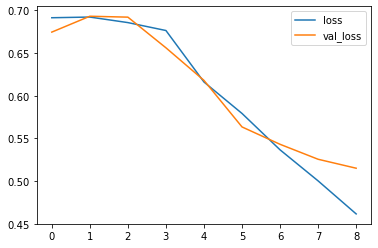

In [74]:
metrics[['loss','val_loss']].plot()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


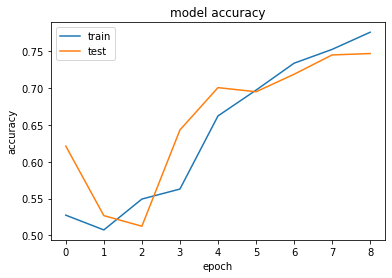

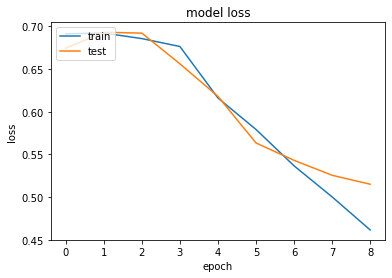

In [75]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Finally we see in graphs that train and validation sets scores increase together, which is what we want